In [ ]:
pip install boto3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 6.2 MB/s eta 0:00:00


In [ ]:
import boto3

filename = "cardio_clean.csv"
df_predict.to_csv(filename, index=False)

aws_access_key = 'xxx'
aws_secret_key = 'xxx'
region = 'ap-southeast-1'
bucket_name = 'public-bucket-nhuttan-01'


s3 = boto3.client('s3',
                  aws_access_key_id=aws_access_key,
                  aws_secret_access_key=aws_secret_key,
                  region_name=region)

s3.upload_file(Filename=filename,
               Bucket=bucket_name,
               Key=f"data/processed/{filename}")

print(f" Đã upload {filename} lên bucket `{bucket_name}`")

In [ ]:
# Đọc dữ liệu
df = pd.read_csv('cardio_clean.csv')
df.describe()

,age_years,height,weight,ap_hi,ap_lo,cholesterol,cardio,bmi
count,68769.000000,68769.000000,68769.000000,68769.000000,68769.000000,68769.000000,68769.000000,68769.000000
mean,52.824907,164.409850,74.075032,126.579181,81.291527,1.364118,0.494365,27.443978
std,6.769811,7.933894,14.181684,16.486010,9.380132,0.678439,0.499972,5.202859
min,29.000000,100.000000,30.000000,80.000000,40.000000,1.000000,0.000000,13.493001
25%,48.000000,159.000000,65.000000,120.000000,80.000000,1.000000,0.000000,23.875115
50%,53.000000,165.000000,72.000000,120.000000,80.000000,1.000000,0.000000,26.346494
75%,58.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,30.116213
max,64.000000,207.000000,180.000000,200.000000,120.000000,3.000000,1.000000,60.000000




##  1. Boxplot so sánh theo nhóm bệnh cardio


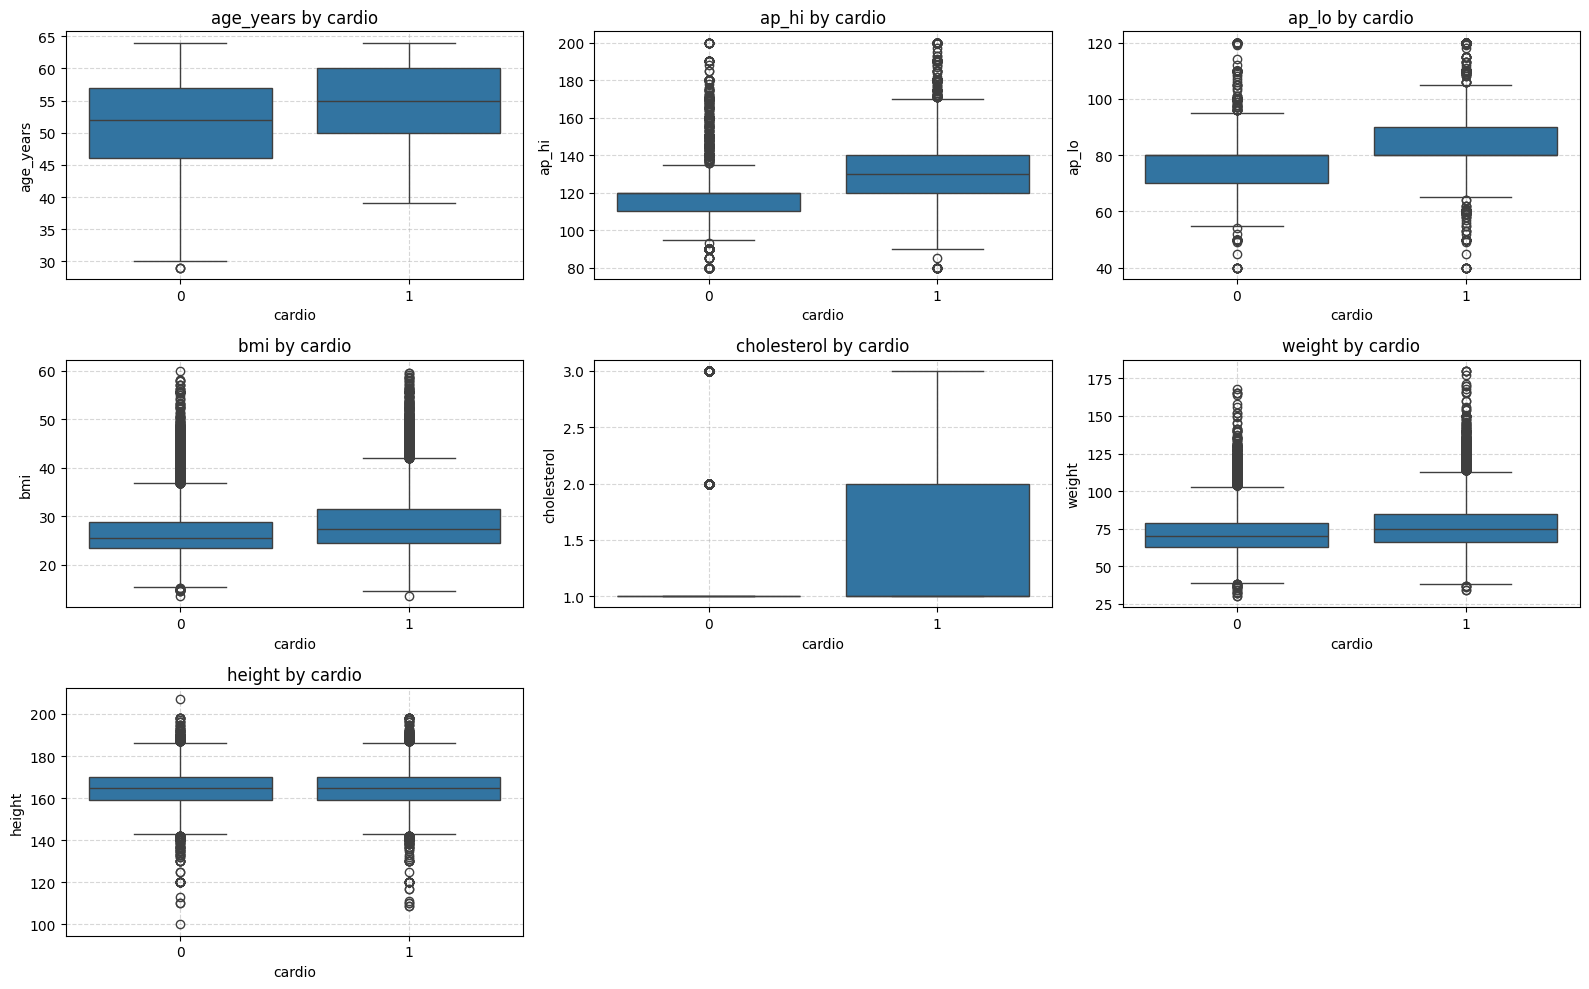

In [ ]:
features = ['age_years', 'ap_hi', 'ap_lo', 'bmi', 'cholesterol', 'weight', 'height']

plt.figure(figsize=(16, 10))
for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x='cardio', y=col)
    plt.title(f'{col} by cardio')
    plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## 2. Histogram so sánh phân bố theo nhóm bệnh




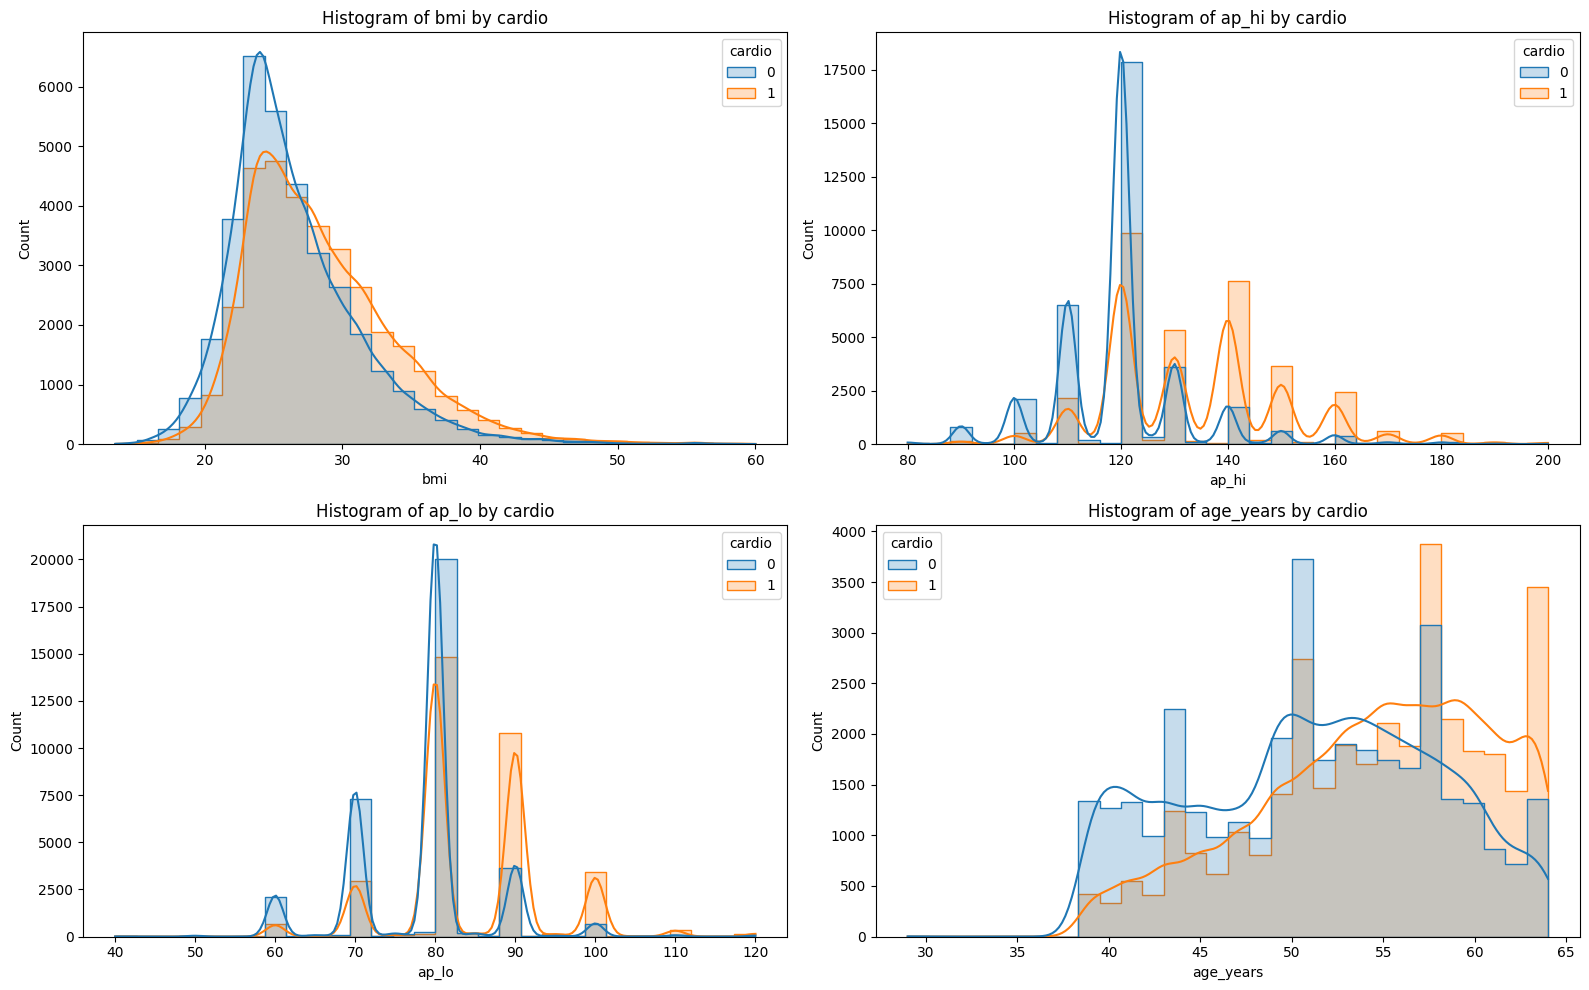

In [ ]:
features = ['bmi', 'ap_hi', 'ap_lo', 'age_years']

plt.figure(figsize=(16, 10))
for i, col in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=col, hue='cardio', bins=30, kde=True, element="step")
    plt.title(f'Histogram of {col} by cardio')
plt.tight_layout()
plt.show()



 3. Countplot các biến phân loại theo cardio



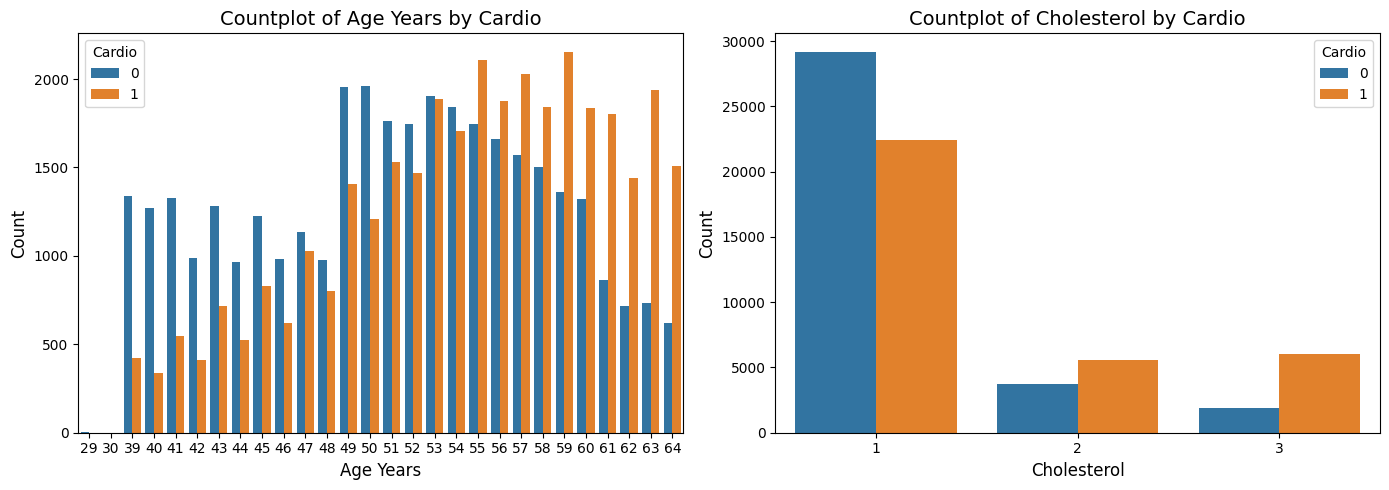

In [ ]:
cat_vars = ['age_years', 'cholesterol']
n = len(cat_vars)

# Tính số hàng và cột để sắp xếp subplots
ncols = 2
nrows = (n + 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 5 * nrows))

axes = axes.flatten()

for i, col in enumerate(cat_vars):
    sns.countplot(data=df, x=col, hue='cardio', ax=axes[i])
    axes[i].set_title(f'Countplot of {col.replace("_", " ").title()} by Cardio', fontsize=14)
    axes[i].set_xlabel(col.replace("_", " ").title(), fontsize=12)
    axes[i].set_ylabel("Count", fontsize=12)
    axes[i].legend(title='Cardio')

# Ẩn subplot thừa (nếu có)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


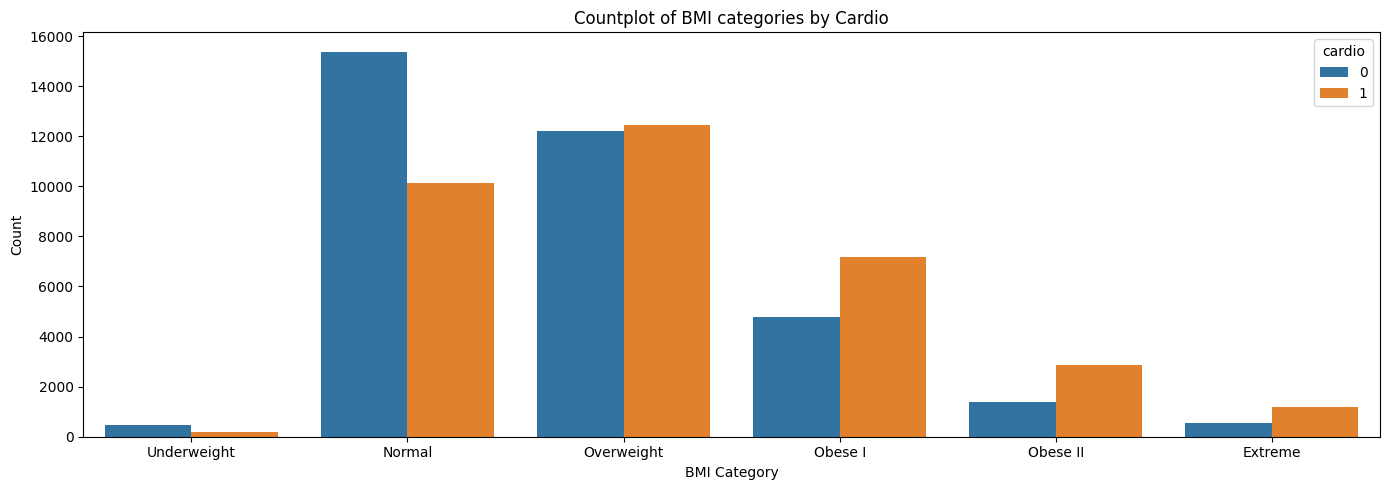

In [ ]:
# Phân loại bmi thành nhóm
df['bmi_bin'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, 35, 40, 100],
                       labels=['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Extreme'])

# Vẽ lại countplot
plt.figure(figsize=(14, 5))
sns.countplot(data=df, x='bmi_bin', hue='cardio')
plt.title('Countplot of BMI categories by Cardio')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


4. Correlation Heatmap

/tmp/ipython-input-32-3267554007.py:8: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


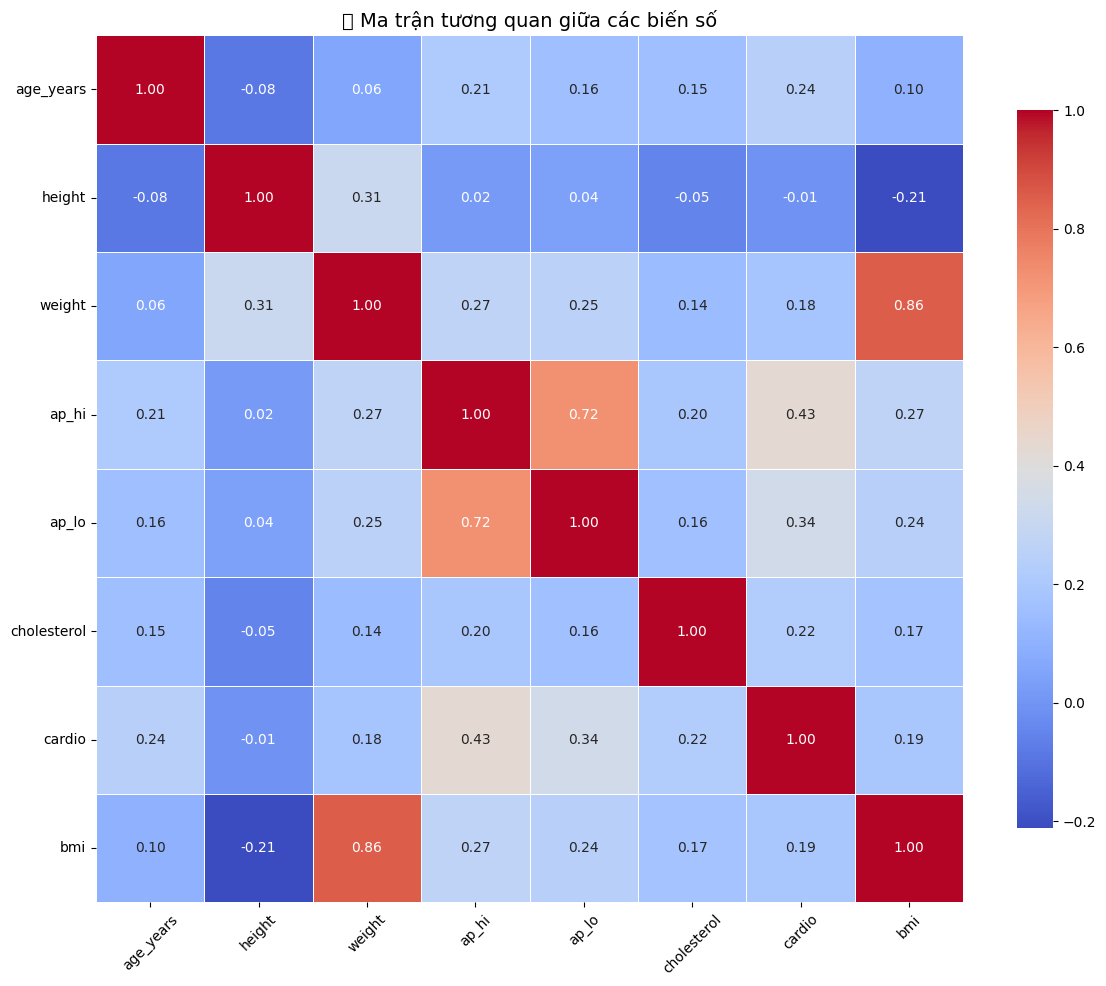

In [ ]:
# 1. Correlation Heatmap
plt.figure(figsize=(12, 10))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, square=True, cbar_kws={"shrink": 0.8})
plt.title("📊 Ma trận tương quan giữa các biến số", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 5. Pairplot

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


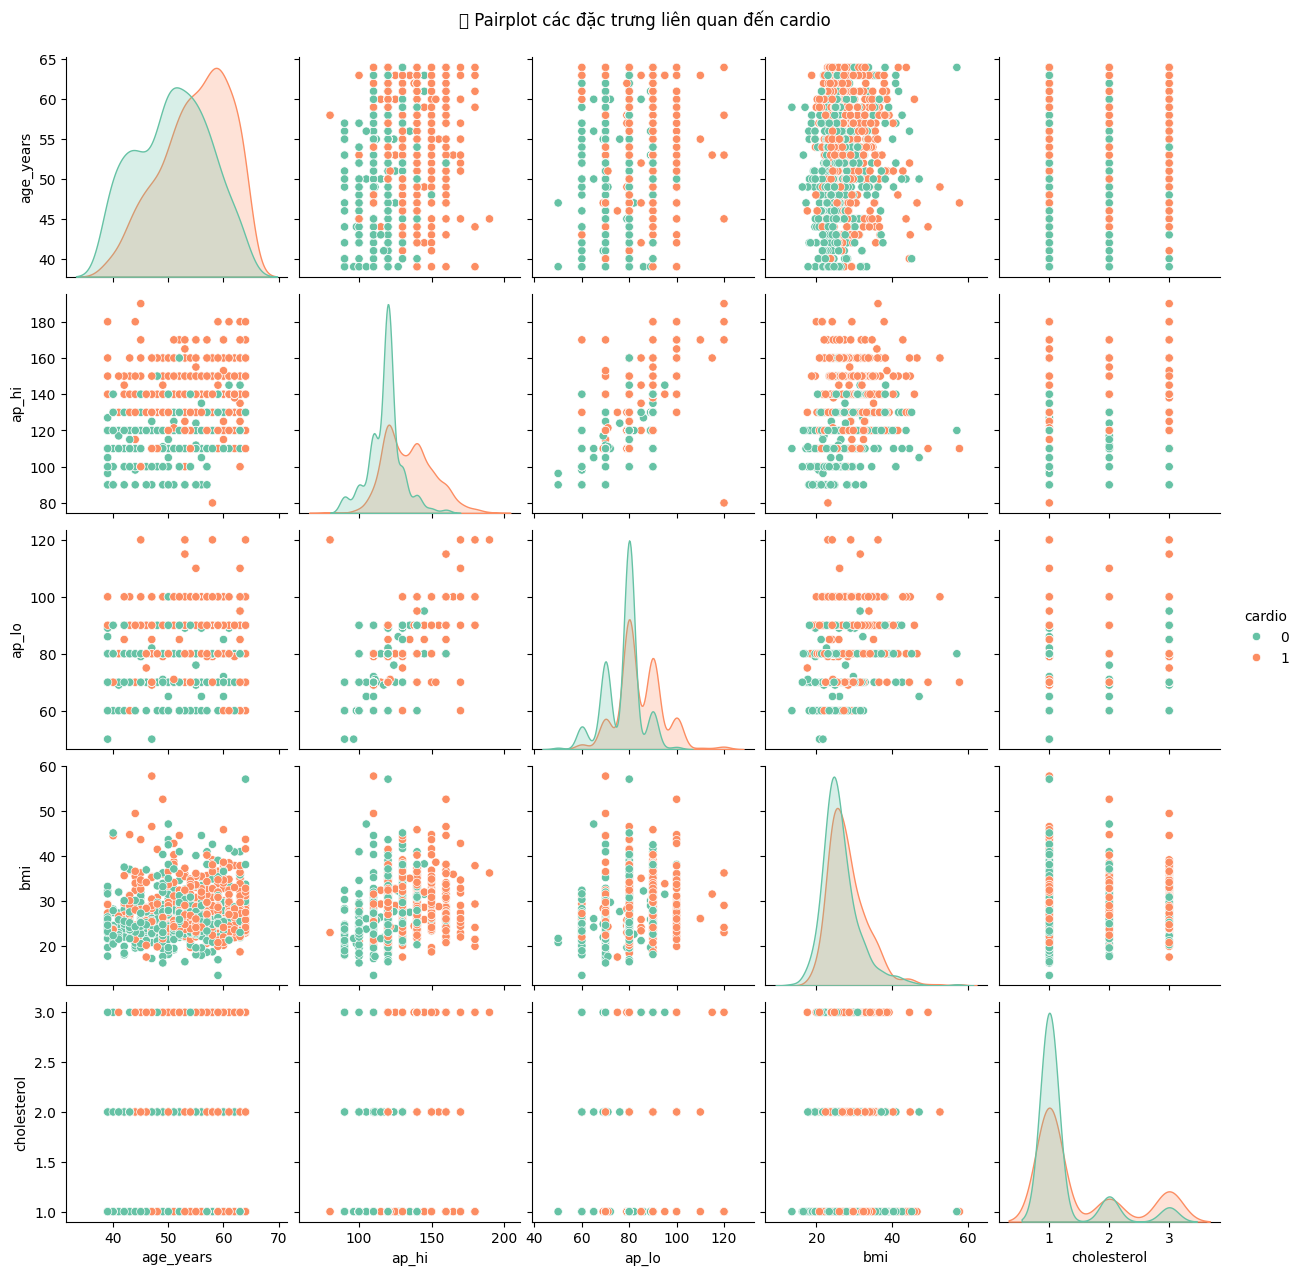

In [ ]:
#  2. Pairplot
selected_features = ['age_years', 'ap_hi', 'ap_lo', 'bmi', 'cholesterol', 'cardio']
df_sample = df[selected_features].sample(1000, random_state=42) if len(df) > 1000 else df[selected_features]
sns.pairplot(df_sample, hue='cardio', diag_kind='kde', palette='Set2')
plt.suptitle(" Pairplot các đặc trưng liên quan đến cardio", y=1.02)
plt.show()


## Pie chart

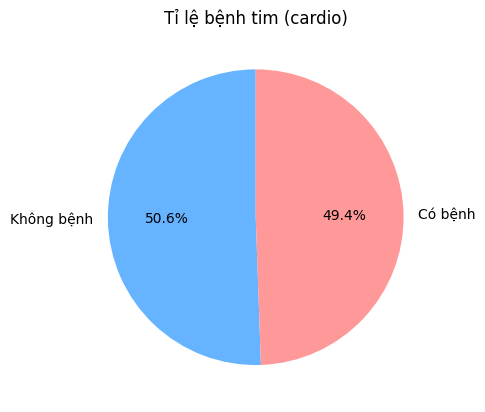

In [ ]:
df['cardio'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, labels=['Không bệnh', 'Có bệnh'], colors=['#66b3ff','#ff9999'])
plt.ylabel('')
plt.title('Tỉ lệ bệnh tim (cardio)')
plt.show()
